In [15]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

import gym
import d4rl

from rlkit.torch.networks import Mlp
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
def get_bonus(obs, actions, network, target_network):
    x = torch.from_numpy(obs)
    y = torch.from_numpy(actions)
    data = torch.cat((x, y), dim=1)
    print('size of data:{}'.format(data.size()))
    
    out1 = network(data)
    out2 = target_network(data)
    bonus = abs(out1 - out2)
    print('size of bonus:{}'.format(bonus.size()))
    
    return bonus

In [57]:
def load_models(model_name):
    
    M = 64
    network = Mlp(
        input_size=obs_dim + action_dim,
        output_size=1,
        hidden_sizes=[M, M],
    )

    target_network = Mlp(
    input_size=obs_dim + action_dim,
    output_size=1,
    hidden_sizes=[M, M],
    )
    
    path = '../models/{}'.format(model_name)
    checkpoint = torch.load(path, map_location='cpu')
    network.load_state_dict(checkpoint['network_state_dict'])
    target_network.load_state_dict(checkpoint['target_state_dict'])

    print('Loading model: {}'.format(path))
    
    return network, target_network

In [44]:
env_name = 'halfcheetah-medium-v0'

env = gym.make(env_name)
obs_dim = env.observation_space.low.size
action_dim = env.action_space.low.size

print(obs_dim)
print(action_dim)

dataset = env.get_dataset()
obs = dataset['observations']
actions = dataset['actions']
rewards = dataset['rewards']


17
6


In [48]:
model_name = 'Nov-03-2020_1648_halfcheetah-medium-v0.pt'
network, target_network = load_models(model_name)
bonus = get_bonus(obs, actions, network, target_network).detach().cpu().numpy()

Loading model: ../models/Nov-03-2020_1648_halfcheetah-medium-v0.pt
size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])


<AxesSubplot:ylabel='Count'>

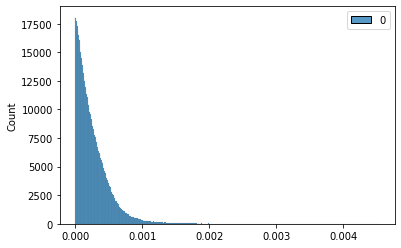

In [49]:
sns.histplot(bonus)


<AxesSubplot:ylabel='Count'>

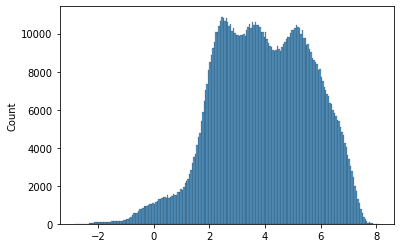

In [51]:
sns.histplot(rewards)

In [52]:
reward_rng = max(rewards) - min(rewards)
bonus_rng = max(bonus) - min(bonus)

print('range bonus:{}, rewards:{}'.format(bonus_rng, reward_rng))

range bonus:[0.00454132], rewards:10.932053565979004


In [53]:
scale = reward_rng / bonus_rng
w = 2.5
print('scale:{}'.format(scale))
print('beta:{}'.format(w * scale))

scale:[2407.2402]
beta:[6018.1006]


## hopper-medium

In [55]:
env_name = 'hopper-medium-v0'

env = gym.make(env_name)
obs_dim = env.observation_space.low.size
action_dim = env.action_space.low.size

print(obs_dim)
print(action_dim)

dataset = env.get_dataset()
obs = dataset['observations']
actions = dataset['actions']
rewards = dataset['rewards']

11
3


In [58]:
model_name = 'Nov-09-2020_1517_hopper-medium-v0.pt'
network, target_network = load_models(model_name)
bonus = get_bonus(obs, actions, network, target_network).detach().cpu().numpy()

Loading model: ../models/Nov-09-2020_1517_hopper-medium-v0.pt
size of data:torch.Size([1000000, 14])
size of bonus:torch.Size([1000000, 1])


<AxesSubplot:ylabel='Count'>

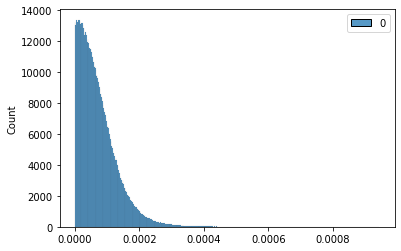

In [59]:
sns.histplot(bonus)

<AxesSubplot:ylabel='Count'>

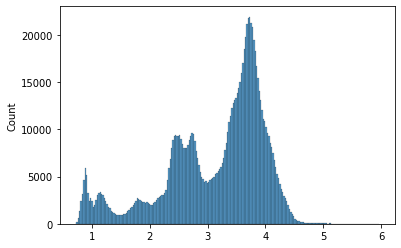

In [60]:
sns.histplot(rewards)

In [61]:
reward_rng = max(rewards) - min(rewards)
bonus_rng = max(bonus) - min(bonus)

print('range bonus:{}, rewards:{}'.format(bonus_rng, reward_rng))

range bonus:[0.00094356], rewards:5.25816535949707


In [62]:
scale = reward_rng / bonus_rng
w = 2.5
print('scale:{}'.format(scale))
print('beta:{}'.format(w * scale))

scale:[5572.6934]
beta:[13931.733]


## Walker2d-medium


In [64]:
env_name = 'walker2d-medium-v0'

env = gym.make(env_name)
obs_dim = env.observation_space.low.size
action_dim = env.action_space.low.size

print(obs_dim)
print(action_dim)

17
6


In [65]:
dataset = env.get_dataset()
obs = dataset['observations']
actions = dataset['actions']
rewards = dataset['rewards']

In [66]:
model_name = 'Nov-19-2020_1043_walker2d-medium-v0.pt'
network, target_network = load_models(model_name)
bonus = get_bonus(obs, actions, network, target_network).detach().cpu().numpy()



Loading model: ../models/Nov-19-2020_1043_walker2d-medium-v0.pt
size of data:torch.Size([1000000, 23])
size of bonus:torch.Size([1000000, 1])


<AxesSubplot:ylabel='Count'>

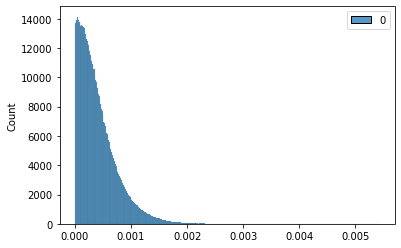

In [25]:
sns.histplot(bonus)


<AxesSubplot:ylabel='Count'>

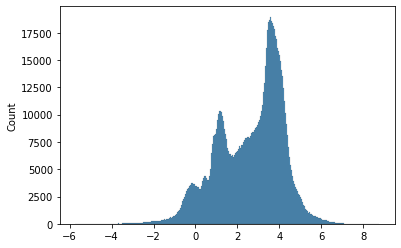

In [26]:
sns.histplot(rewards)


In [33]:
reward_rng = max(rewards) - min(rewards)
bonus_rng = max(bonus) - min(bonus)

print('range bonus:{}, rewards:{}'.format(bonus_rng, reward_rng))



range bonus:[0.00542762], rewards:14.513020515441895


In [67]:
scale = reward_rng / bonus_rng
w = 2.5
print('scale:{}'.format(scale))
print('beta:{}'.format(w * scale))

scale:[5572.6934]
beta:[13931.733]
